In [188]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso,LassoCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [133]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_wo=train[list(test.columns)]
combo=pd.concat([train_wo,test],axis=0)
#combo.head()

In [134]:
for col in range(0,len(combo.columns)):
    df=combo[combo.columns[col]].isnull().value_counts()
    if df[0] != combo.shape[0]:
        print(' Dirty = ', combo.columns[col],',', df[1])

 Dirty =  MSZoning , 4
 Dirty =  LotFrontage , 486
 Dirty =  Alley , 2721
 Dirty =  Utilities , 2
 Dirty =  Exterior1st , 1
 Dirty =  Exterior2nd , 1
 Dirty =  MasVnrType , 24
 Dirty =  MasVnrArea , 23
 Dirty =  BsmtQual , 81
 Dirty =  BsmtCond , 82
 Dirty =  BsmtExposure , 82
 Dirty =  BsmtFinType1 , 79
 Dirty =  BsmtFinSF1 , 1
 Dirty =  BsmtFinType2 , 80
 Dirty =  BsmtFinSF2 , 1
 Dirty =  BsmtUnfSF , 1
 Dirty =  TotalBsmtSF , 1
 Dirty =  Electrical , 1
 Dirty =  BsmtFullBath , 2
 Dirty =  BsmtHalfBath , 2
 Dirty =  KitchenQual , 1
 Dirty =  Functional , 2
 Dirty =  FireplaceQu , 1420
 Dirty =  GarageType , 157
 Dirty =  GarageYrBlt , 159
 Dirty =  GarageFinish , 159
 Dirty =  GarageCars , 1
 Dirty =  GarageArea , 1
 Dirty =  GarageQual , 159
 Dirty =  GarageCond , 159
 Dirty =  PoolQC , 2909
 Dirty =  Fence , 2348
 Dirty =  MiscFeature , 2814
 Dirty =  SaleType , 1


In [135]:
#(combo.groupby(by=combo['MSZoning'],as_index=True).mean())
#combo[combo['MSZoning'].isnull()]
#combo['MSZoning'].mode()
#combo['MSZoning']=combo['MSZoning'].fillna('RL')
#combo['MSZoning'].isnull().any()
#combo['SaleType'].value_counts()
#combo[['OverallQual','KitchenQual']].groupby('KitchenQual').mean()
#combo['MasVnrType']=combo['MasVnrType'].fillna('None')
#combo['MasVnrArea']=combo['MasVnrArea'].fillna(0)
#combo['Alley']=combo['Alley'].fillna('None')
#combo['Street'] = combo['Street'].map({"Grvl":0,"Pave":1})
#combo['BsmtFinType1']=combo['BsmtFinType1'].map({"GLQ":10,"ALQ":8,"BLQ":6,"Rec":4,"LwQ":2,"Unf":1,"None":0})
#combo['BsmtFinType2']=combo['BsmtFinType2'].map({"GLQ":10,"ALQ":8,"BLQ":6,"Rec":4,"LwQ":2,"Unf":1,"None":0})
#combo['CentralAir']=combo['CentralAir'].map({"N":0,"Y":1})
#sns.distplot(np.log(train['SalePrice']),kde=True)
#plt.show()
#for col in ('LotFrontage', 'LotArea','OverallQual', 'OverallCond','YearRemodAdd'):
#sns.distplot((combo[col]))
#plt.show()

In [136]:
combo["LotFrontage"] = combo.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
combo['Exterior1st']=combo['Exterior1st'].fillna('MetalSd')
combo['Exterior2nd']=combo['Exterior2nd'].fillna('MetalSd')
combo["Functional"]=combo["Functional"].fillna("Typ")
combo['Utilities'].value_counts()
combo=combo.drop('Utilities',axis=1)
#combo=combo.drop('YearBuilt',axis=1)

In [137]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','Alley','MSSubClass','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'):
    combo[col]=combo[col].fillna('None')

In [138]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','MasVnrArea','GarageYrBlt','GarageCars','GarageArea'):
    combo[col]=combo[col].fillna(0)

In [139]:
for col in ('Electrical','KitchenQual','SaleType','MSZoning'):
    combo[col]=combo[col].fillna(combo[col].mode()[0])

In [140]:
combo.isnull().any().value_counts()

False    79
dtype: int64

In [141]:
combo['MSSubClass'] = combo['MSSubClass'].apply(str)
combo['YrSold'] = combo['YrSold'].astype(str)
combo['MoSold'] =combo['MoSold'].astype(str)

In [142]:
combo.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPo

## Outlier Detection Z score method
for col in combo.columns.tolist():
    if combo[col].dtype == 'int64':
        score=zscore(combo[col])
        combo=combo[score<20]

In [143]:
from sklearn.preprocessing import LabelEncoder
c=('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass','YrSold', 'MoSold')
for col in c:
    enc=LabelEncoder()
    enc.fit(combo[col].unique().tolist())
    combo[col]=enc.transform(combo[col])

In [144]:
combo['TotalSF'] = combo['TotalBsmtSF'] +combo['1stFlrSF'] +combo['2ndFlrSF']

In [145]:
combo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,...,0,3,4,None,0,4,2,WD,Normal,2566.0
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,...,0,3,4,None,0,7,1,WD,Normal,2524.0
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,...,0,3,4,None,0,11,2,WD,Normal,2706.0
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,...,0,3,4,None,0,4,0,WD,Abnorml,2473.0
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,...,0,3,4,None,0,3,2,WD,Normal,3343.0


In [146]:
skewness=combo.skew().sort_values(ascending=False)
skewness=skewness[abs(skewness)>0.1]
h_skewd=skewness.index.tolist()
from scipy.special import boxcox
for col in h_skewd:
    #combo[col]=boxcox(combo[col],0.1)
    combo[col]=np.log1p(combo[col])

In [147]:
combo=pd.get_dummies(combo)
combo.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,2.397895,4.189655,9.042040,0.693147,0.693147,1.386294,0.0,2.079442,1.791759,...,0,0,0,1,0,0,0,0,1,0
1,2,1.791759,4.394449,9.169623,0.693147,0.693147,1.386294,0.0,1.945910,2.197225,...,0,0,0,1,0,0,0,0,1,0
2,3,2.397895,4.234107,9.328212,0.693147,0.693147,0.000000,0.0,2.079442,1.791759,...,0,0,0,1,0,0,0,0,1,0
3,4,2.484907,4.110874,9.164401,0.693147,0.693147,0.000000,0.0,2.079442,1.791759,...,0,0,0,1,1,0,0,0,0,0
4,5,2.397895,4.442651,9.565284,0.693147,0.693147,0.000000,0.0,2.197225,1.791759,...,0,0,0,1,0,0,0,0,1,0


In [148]:
combo.shape

(2919, 222)

In [149]:
train_new=combo[:train.shape[0]]
test_new=combo[test.shape[0]+1:]
train_new['SalePrice']=np.log1p(train['SalePrice'])

In [150]:
clean_data=train_new.copy()
test_data=test_new.copy()

In [151]:
Y=clean_data[['SalePrice']].copy()
X=clean_data.copy()

In [152]:
del X['SalePrice']
del X['Id']
T=test_data.copy()
del T['Id']

In [153]:
#Function for calculating RMSLE
def rmsle(model):
    model.fit(X_train,y_train)
    from math import sqrt
    from sklearn.metrics import mean_squared_error
    score=sqrt(mean_squared_error((model.predict(X_test)),(y_test)))
    return score

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [155]:
#Random Forest Regressor

rfr=RandomForestRegressor(n_estimators=180,random_state=0,max_leaf_nodes=100)
rfr.fit(X_train,y_train)
#rfr.fit(X,Y)
#y_pred=rfr.predict(T)
rmsle(rfr)

0.14166659496171294

In [156]:
gba=GradientBoostingRegressor(random_state=0,max_leaf_nodes=18)
#gba.fit(X,Y)
#y_pred=gba.predict(T)
#rmsle(gba)

0.12232289536871911

In [ ]:
rfecv=RFECV(gba,cv=3)
#rfecv.fit(X_train,y_train)
rmsle(rfecv)

In [185]:
lasso=Lasso(alpha=0.00095)
rmsle(lasso)

0.13653161843261755

In [158]:
bb=BaggingRegressor(random_state=0)
rmsle(bb)
#RandomForestRegressor?

0.14694156588656626

In [174]:
dtr=DecisionTreeRegressor(random_state=0,max_leaf_nodes=61,max_features=105)
rmsle(dtr)
#DecisionTreeRegressor

0.1875468183578281

In [90]:
list=['DecisionTreeRegressor','BaggingRegressor','GradientBoostingRegressor','RandomForestRegressor']
score=[rmsle(dtr),rmsle(bb),rmsle(gba),rmsle(rfr)]
df=pd.DataFrame(score,list)

In [95]:
df['Value']=df[0]
df.drop(0,axis=1)
df['Value'].mean()

0.15035934019988106

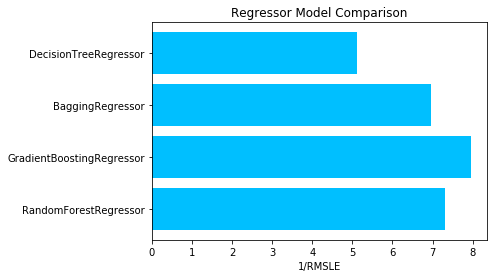

In [101]:
fig, ax = plt.subplots()
y_ax = ('DecisionTreeRegressor','BaggingRegressor','GradientBoostingRegressor','RandomForestRegressor')
y_pos = (0,1,2,3)
values = (1/df['Value'])
ax.barh(y_pos, values, align='center',color='deepskyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_ax)
ax.invert_yaxis()
ax.set_xlabel('1/RMSLE')
ax.set_title('Regressor Model Comparison')
plt.show()

In [58]:
LassoCV?

In [68]:
## Grid Search for optimum hyper parameters

from sklearn.model_selection import GridSearchCV

grid_values={'max_leaf_nodes':[18,20,22]}
clf2=GradientBoostingRegressor(random_state=0)

## Metric to optimize over grid parameters: Negative Mean Squared Error

grid_clf = GridSearchCV(clf2, param_grid = grid_values, scoring = 'neg_mean_squared_error')
grid_clf.fit(X_train, y_train)
y_scores = grid_clf.predict(X_test) 

print('Test set accuracy: ', rmsle(grid_clf))
print('Grid best parameter : ', grid_clf.best_params_)
print('Grid best score : ', grid_clf.best_score_)

Test set accuracy:  0.12232289536871911
Grid best parameter (Negative Mean Squared Error):  {'max_leaf_nodes': 18}
Grid best score (Negative Mean Squared Error):  -0.0171856735811


### File formation
col=np.expm1(y_pred)
f=pd.DataFrame(col)
f=f.rename(columns={0:'SalePrice'})
f['Id']=test_new['Id']
lis=['Id','SalePrice']
f=f[lis]
f=f.dropna()
f['Id']=f['Id'].astype(int)
f=f.set_index('Id',drop=True)
f.to_csv('GradientBoostingRegressor_3.csv')
#f[f['SalePrice']<0]